# Feature Selection
## Classification - Categorical Input
Breast Cancer data can be found [here](https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv)    
Data Description: [here](https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.names)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.feature_selection import SelectKBest, chi2

from sklearn.linear_model import LogisticRegression

In [3]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv'
df = pd.read_csv(url, header=None)

In [4]:
df.isnull().sum(axis=0)

0    0
1    0
2    0
3    0
4    8
5    0
6    0
7    1
8    0
9    0
dtype: int64

In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [7]:
si = SimpleImputer(strategy='most_frequent')
si.fit(X_train)
X_train = si.transform(X_train)
X_test = si.transform(X_test)

In [8]:
oe = OrdinalEncoder()
oe.fit(X_train)
X_train_enc = oe.transform(X_train)
X_test_enc = oe.transform(X_test)

In [9]:
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

In [10]:
fs = SelectKBest(score_func=chi2, k=3)
fs.fit(X_train_enc, y_train_enc)
X_train_fs = fs.transform(X_train_enc)
X_test_fs = fs.transform(X_test_enc)

It is not very pythonic to use something like    
 ```for i in range(len(my_list)):```     
Instead use the built-in function `enumerate` which returns tuples of the index of an element and the element itself:     
```for i, element in enumerate(my_list):```    
To show, that you don't need the element itself you can use the `_` underscore:    
```for i, _ in enumerate(my_list):```

See also [this link](https://dev.to/wangonya/when-to-use-python-s-enumerate-instead-of-range-in-loops-3e03)

<BarContainer object of 9 artists>

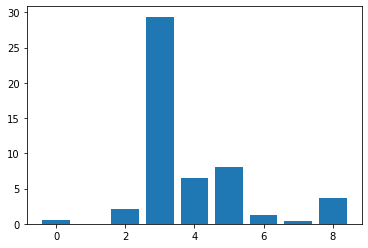

In [11]:
plt.bar([i for i, _ in enumerate(fs.scores_)], fs.scores_)

Further information on feature selection with $\chi^2$ [here](https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223)

In [12]:
model = LogisticRegression()
model.fit(X_train_enc, y_train)
model.score(X_test_enc, y_test)

0.7473684210526316

In [13]:
model = LogisticRegression()
model.fit(X_train_fs, y_train)
model.score(X_test_fs, y_test)

0.7684210526315789